In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn
from sklearn.model_selection import train_test_split

### Import data set

In [162]:
data = pd.read_excel (r'./utilities/data/Concrete_Data.xls')
print (data.shape)

(1030, 9)


In [163]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Split data set into features and target values

In [164]:
x = data.iloc[0:1030, :-1]
y = data.iloc[:,-1]

In [165]:
print('x shape: ' , x.shape)
print('y shape: ' , y.shape)

x shape:  (1030, 8)
y shape:  (1030,)


## Scatter plots for features vs target variable

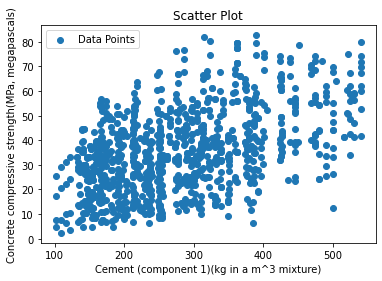

In [166]:
plt.scatter(x.iloc[:,0],y)
plt.title('Scatter Plot')
plt.xlabel("Cement (component 1)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

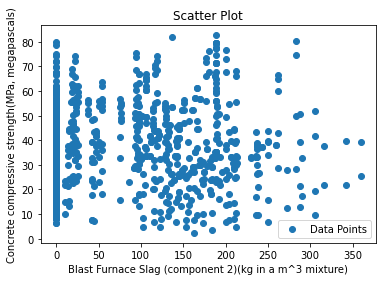

In [167]:
plt.scatter(x.iloc[:,1],y)
plt.title('Scatter Plot')
plt.xlabel("Blast Furnace Slag (component 2)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

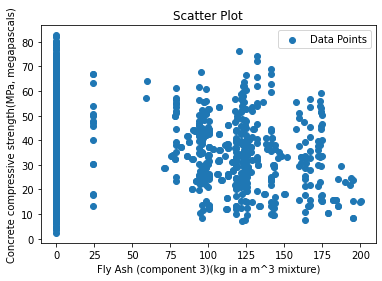

In [168]:
plt.scatter(x.iloc[:,2],y)
plt.title('Scatter Plot')
plt.xlabel("Fly Ash (component 3)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

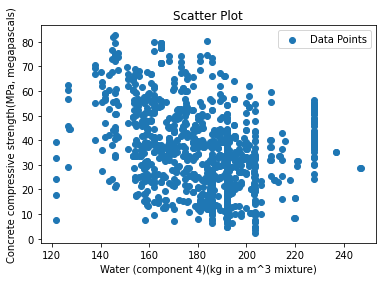

In [169]:
plt.scatter(x.iloc[:,3],y)
plt.title('Scatter Plot')
plt.xlabel("Water (component 4)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

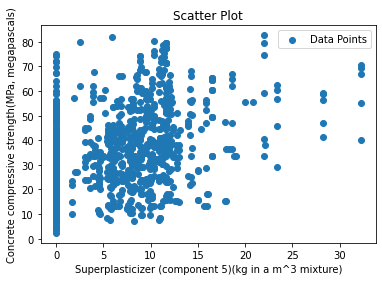

In [170]:
plt.scatter(x.iloc[:,4],y)
plt.title('Scatter Plot')
plt.xlabel("Superplasticizer (component 5)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

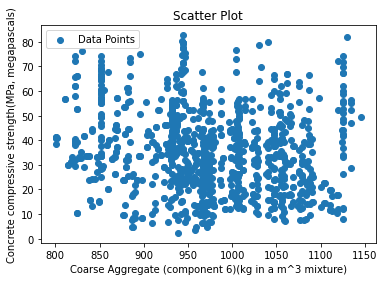

In [171]:
plt.scatter(x.iloc[:,5],y)
plt.title('Scatter Plot')
plt.xlabel("Coarse Aggregate (component 6)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

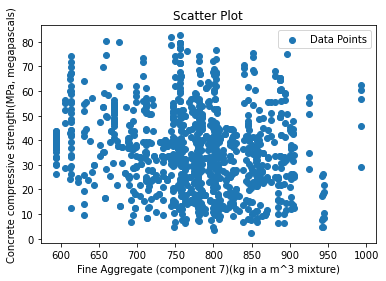

In [172]:
plt.scatter(x.iloc[:,6],y)
plt.title('Scatter Plot')
plt.xlabel("Fine Aggregate (component 7)(kg in a m^3 mixture)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

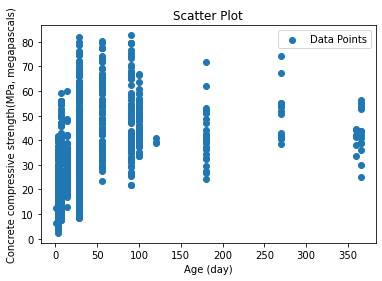

In [173]:
plt.scatter(x.iloc[:,7],y)
plt.title('Scatter Plot')
plt.xlabel("Age (day)")
plt.ylabel("Concrete compressive strength(MPa, megapascals)")
plt.legend(['Data Points', 'Model'])
plt.show()

### Split the data into training and testing sets

In [174]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

print("Size of the training set: " + str(x_train.shape[0]))
print("Size of the test/evaluation set: " + str(x_test.shape[0]))

Size of the training set: 824
Size of the test/evaluation set: 206


### Derivative w.r.t m

In [175]:
def derivate_M(x, y, m, b):
    n = len(x)
    y_pred = m * x + b
    d_m = (-2/n) * np.sum(x * (y - y_pred)) #derivative w.r.t m
    return d_m

### Derivative w.r.t b 

In [176]:
def derivate_B(x, y, m, b):
    n = len(x)
    y_pred = m * x + b
    d_b = (-2/n) * np.sum(y - y_pred) #derivative w.r.t b
    return d_b

### Mean Square Error function

In [224]:
def meanSquareError(x, y, m, b):
    n = len(x)
    y_predict = m * x + b
    mse = (1/n) * np.sum(np.square(y - y_predict))
    return mse

### Univariate Regression

In [221]:
def univariateRegression(x,y, max_iter, alpha):
    n = len(x)
    num_iter = 0

    m = np.random.uniform(0,1)
    b = np.random.uniform(0,1)
    
    loss = meanSquareError(x, y, m, b)
    
    while (num_iter < max_iter):
        m_new = m - alpha * derivate_M(x,y,m,b)
        b_new = b - alpha * derivate_B(x,y,m,b)
        updated_MSE = meanSquareError(x,y,m_new,b_new)
        
        if updated_MSE > loss:
            alpha = alpha * 0.8
        elif updated_MSE <= loss:
            alpha = alpha * 1.15
        
        loss = updated_MSE
        m = m_new
        b = b_new
        num_iter+=1
    
    y_predict = m * x + b
    
    variance_computed = (np.max(y) - np.min(y))
    required_var = 1 - (loss/variance_computed)
    
    return m, b, loss, y_predict, required_var

### Train univariate model 

In [222]:
def univariateTrain(x_train, y_train):
    max_iter = 10000
    alpha = 0.0000001
    dictionary = {}
    for i in range(0, 8):
        current_x_train = x_train.iloc[:,i]
        m, b, loss, pred, var_req = univariateRegression(current_x_train, y_train, max_iter, alpha)
        current_x_test = x_test.iloc[:,i]
        dictionary[str(i+1)] = [m, b, loss, current_x_test, pred, var_req]
    return dictionary

### Results of training univariate model

In [225]:
dictionary = univariateTrain(x_train,y_train)

for key in dictionary.keys():
    lossTraining = dictionary[key][2]
    lossTesting = meanSquareError(dictionary[key][3], y_test, dictionary[key][0],dictionary[key][1])
    print("Feature number ", key , " has Training loss: " , lossTraining, ", Testing Loss: " , lossTesting, ", Final M value is: "
         ,dictionary[key][0], ", Final B value is: ", dictionary[key][1], ", Required Variance is: ", dictionary[key][5],
         ", Explained variance for testing set is: ",1-(lossTesting/(np.max(y_test)-np.min(y_test))))
    print('')

Feature number  1  has Training loss:  226.50695573610926 , Testing Loss:  231.96727585807523 , Final M value is:  0.11700187701654258 , Final B value is:  1.305619449762883 , Required Variance is:  -1.916862906439626 , Explained variance for testing set is:  -1.9259464894991725

Feature number  2  has Training loss:  379.4914995337032 , Testing Loss:  366.4236812125666 , Final M value is:  0.09607151184180822 , Final B value is:  20.549635626608 , Required Variance is:  -3.88693459634249 , Explained variance for testing set is:  -3.6219281566648185

Feature number  3  has Training loss:  305.61969442104765 , Testing Loss:  310.79071563324914 , Final M value is:  0.03229198968872725 , Final B value is:  30.032719987036966 , Required Variance is:  -2.9356440389969634 , Explained variance for testing set is:  -2.920195208622503

Feature number  4  has Training loss:  334.69377540394584 , Testing Loss:  330.5842530034626 , Final M value is:  0.18492587239576086 , Final B value is:  1.0990

## Scatter plots for univariate linear models

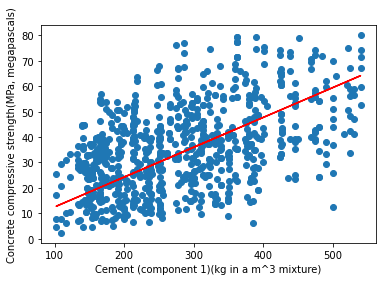

In [181]:
x = x_train.iloc[:,0]
y = 0.8522299420052271 + x*0.11712405915603102
plt.scatter(x, y_train)
plt.xlabel("Cement (component 1)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(x,y, color='red')
plt.show()

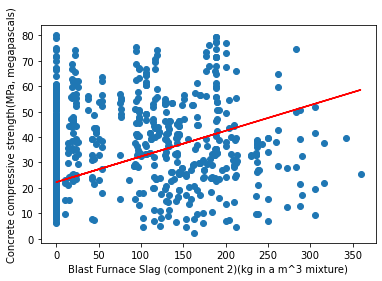

In [182]:
x = x_train.iloc[:,1]
y = 22.28154736767487 + x*0.10080130229301591
plt.scatter(x, y_train)
plt.xlabel("Blast Furnace Slag (component 2)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(x,y, color='red')
plt.show()

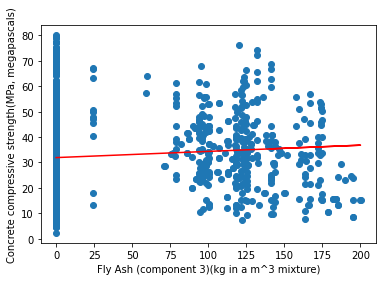

In [183]:
x = x_train.iloc[:,2]
y = 31.92102690512353 + x*0.02435804542555074
plt.scatter(x, y_train)
plt.xlabel("Fly Ash (component 3)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(x,y, color='red')
plt.show()

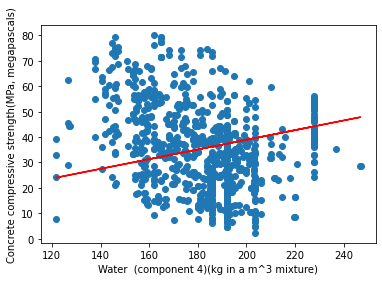

In [184]:
x = x_train.iloc[:,3]
y = 0.9355389744944569 + x*0.1898227259124723
plt.scatter(x, y_train)
plt.xlabel("Water  (component 4)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(x,y, color='red')
plt.show()

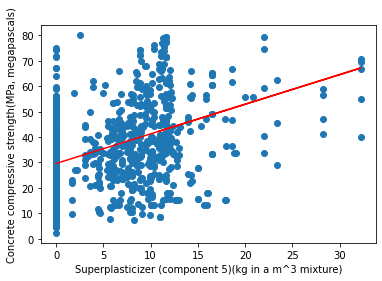

In [185]:
x = x_train.iloc[:,4]
y = 29.61350128015183 + x*1.1638941074061337
plt.scatter(x, y_train)
plt.xlabel("Superplasticizer (component 5)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(x,y, color='red')
plt.show()

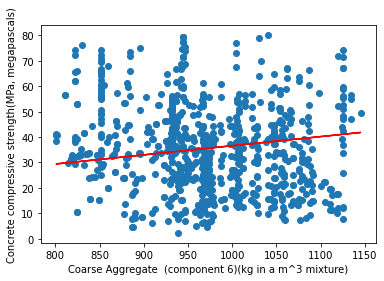

In [186]:
X = x_train.iloc[:,5]
Y = 0.6856867121366843 + X*0.035898023978489076
plt.scatter(X, y_train)
plt.xlabel("Coarse Aggregate  (component 6)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

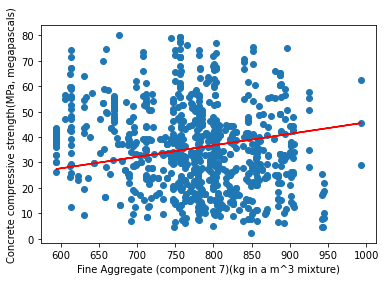

In [187]:
X = x_train.iloc[:,6]
Y = 0.5919116159010577 + X*0.04517874274096155
plt.scatter(X, y_train)
plt.xlabel('Fine Aggregate (component 7)(kg in a m^3 mixture)')
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

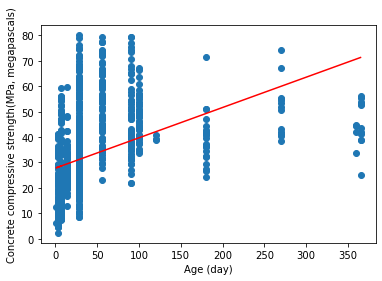

In [188]:
X = x_train.iloc[:,7]
Y = 27.78928962206736 + X*0.11906253475400559
plt.scatter(X, y_train)
plt.xlabel("Age (day)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

### Histogram of feature values before normalizing

C:\Users\talha\miniconda3\envs\cse217a\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


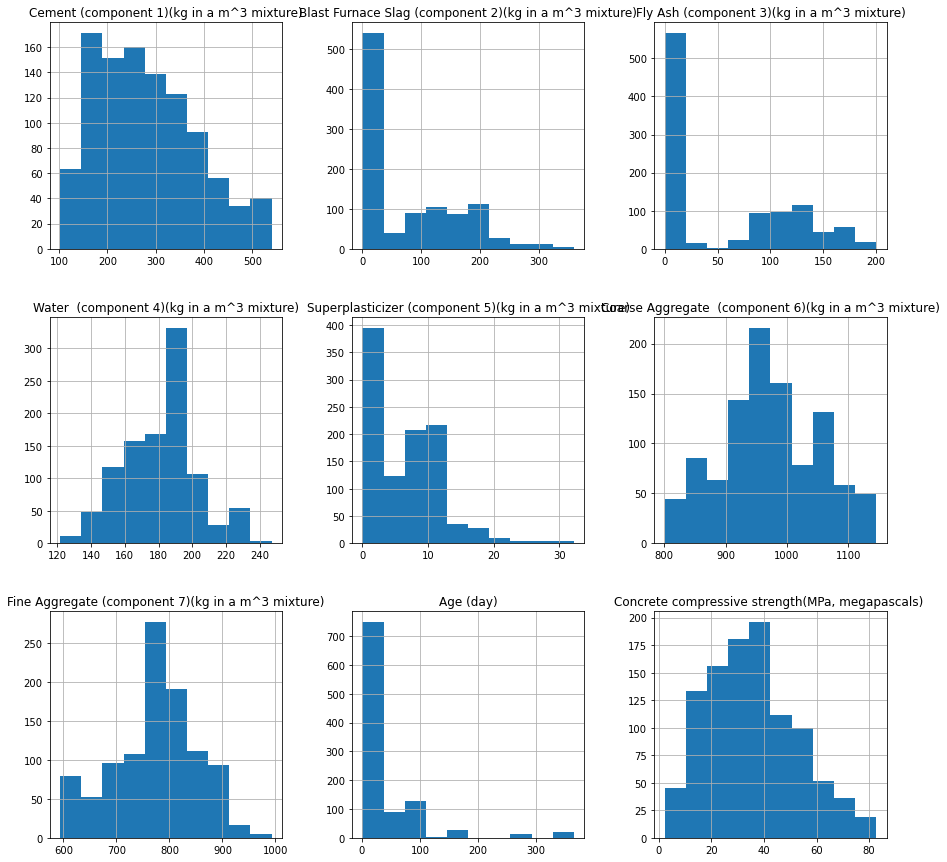

In [189]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
axes_1 = data.hist(ax = ax)

## Normalizing Data

In [190]:
def normalizing(dataframe):
    df_norm = dataframe.copy()
    for col in df_norm.columns:
        if col != 'Concrete compressive strength(MPa, megapascals) ':
            df_norm[col] = (df_norm[col] - df_norm[col].min())/(df_norm[col].min() - df_norm[col].max())
    return df_norm

In [191]:
normalized_data = normalizing(data)

In [192]:
normalized_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,-1.000000,-0.000000,-0.000000,-0.321357,-0.077640,-0.694767,-0.205720,-0.074176,79.986111
1,-1.000000,-0.000000,-0.000000,-0.321357,-0.077640,-0.738372,-0.205720,-0.074176,61.887366
2,-0.526256,-0.396494,-0.000000,-0.848303,-0.000000,-0.380814,-0.000000,-0.739011,40.269535
3,-0.526256,-0.396494,-0.000000,-0.848303,-0.000000,-0.380814,-0.000000,-1.000000,41.052780
4,-0.220548,-0.368392,-0.000000,-0.560878,-0.000000,-0.515698,-0.580783,-0.986264,44.296075
...,...,...,...,...,...,...,...,...,...
1025,-0.398174,-0.322760,-0.451274,-0.461876,-0.276398,-0.200872,-0.437280,-0.074176,44.284354
1026,-0.502740,-0.000000,-0.577711,-0.592814,-0.322981,-0.049128,-0.550426,-0.074176,31.178794
1027,-0.106164,-0.387869,-0.542729,-0.566467,-0.189441,-0.265698,-0.466633,-0.074176,23.696601
1028,-0.130365,-0.519477,-0.000000,-0.429940,-0.350932,-0.548256,-0.488961,-0.074176,32.768036


### Split the normalized data into features and target values

In [193]:
normalized_x = normalized_data.iloc[0:1030, :-1]
normalized_y = normalized_data.iloc[:,-1]

### Split the normalized data into training and testing sets

In [194]:
normalized_x_train, normalized_x_test, normalized_y_train, normalized_y_test = train_test_split(normalized_x, normalized_y, test_size=0.2, random_state=10)

print("Size of the training set: " + str(normalized_x_train.shape[0]))
print("Size of the test/evaluation set: " + str(normalized_x_test.shape[0]))

Size of the training set: 824
Size of the test/evaluation set: 206


### Train univariate linear model on normalized data

In [195]:
def univariateTrain_normed(normalized_x_train, normalized_y_train):
    max_iterations = 10000
    alpha = 0.0000001
    dictionary = {}
    for i in range(0, 8):
        current_x_train = normalized_x_train.iloc[:,i]
        m, b, loss, pred, var_req = univariateRegression(current_x_train, normalized_y_train, max_iterations, alpha)
        current_x_test = normalized_x_test.iloc[:,i]
        dictionary[str(i+1)] = [m, b, loss, current_x_test, pred, var_req]
    return dictionary

### Results of training univariate model on normalized data

In [196]:
dictionary = univariateTrain_normed(normalized_x_train,normalized_y_train)

for key in dictionary.keys():
    lossTraining = dictionary[key][2]
    lossTesting = meanSquareError(dictionary[key][3], y_test, dictionary[key][0],dictionary[key][1])
    print("Feature number ", key , " has Training loss: " , lossTraining, ", Testing Loss: " , lossTesting, ", Final M value is: "
        ,dictionary[key][0], ", Final B value is: ", dictionary[key][1], ", Required Variance is: ", dictionary[key][5],
        ", Explained variance for testing set is: ",1-(lossTesting/(np.max(y_test)-np.min(y_test))))
    print('')

Feature number  1  has Training loss:  208.64981623335942 , Testing Loss:  213.99423749416292 , Final M value is:  -34.852693521891766 , Final B value is:  21.465394886951763 , Required Variance is:  -1.6869060485523466 , Explained variance for testing set is:  -1.6992414583175406

Feature number  2  has Training loss:  274.95325404397795 , Testing Loss:  269.2036184854206 , Final M value is:  -8.399024538742726 , Final B value is:  34.00732906281257 , Required Variance is:  -2.5407343015996267 , Explained variance for testing set is:  -2.395631472388438

Feature number  3  has Training loss:  276.39751509877823 , Testing Loss:  273.03138401539456 , Final M value is:  5.002463923230089 , Final B value is:  37.09590399619482 , Required Variance is:  -2.5593328982046257 , Explained variance for testing set is:  -2.4439134426518025

Feature number  4  has Training loss:  255.79388151826552 , Testing Loss:  253.99171281467784 , Final M value is:  27.85777676723647 , Final B value is:  49.0

## Scatterplots for normalized univariate linear models

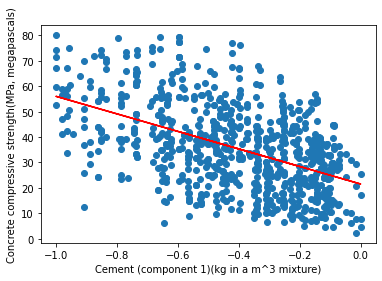

In [197]:
X = normalized_x_train.iloc[:,0]
Y = 21.55868811539026 + X*(-34.41551273956845)
plt.scatter(X, normalized_y_train)
plt.xlabel("Cement (component 1)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

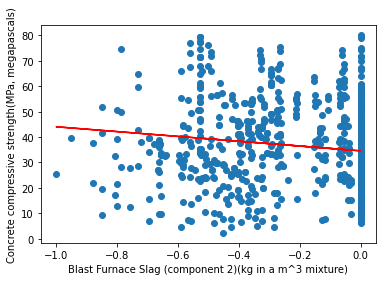

In [198]:
X = normalized_x_train.iloc[:,1]
Y = 34.57264701163823 + X*(-9.455163277904294)
plt.scatter(X, normalized_y_train)
plt.xlabel("Blast Furnace Slag (component 2)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

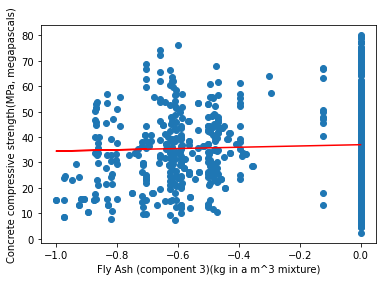

In [199]:
X = normalized_x_train.iloc[:,2]
Y = 36.989734263528 + X*(2.5100304888919296)
plt.scatter(X, normalized_y_train)
plt.xlabel("Fly Ash (component 3)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

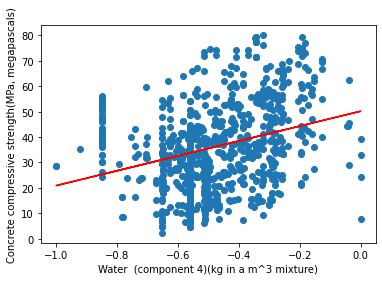

In [200]:
X = normalized_x_train.iloc[:,3]
Y = 50.13579776194517 + X*(29.227245488570478)
plt.scatter(X, normalized_y_train)
plt.xlabel("Water  (component 4)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

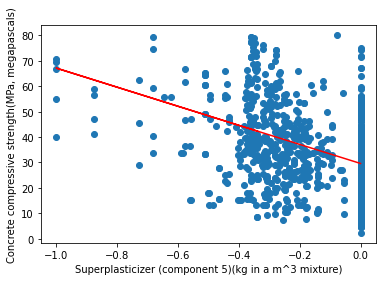

In [201]:
X = normalized_x_train.iloc[:,4]
Y = 29.61350174023185 + X*(-37.47738903931549)
plt.scatter(X, normalized_y_train)
plt.xlabel("Superplasticizer (component 5)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

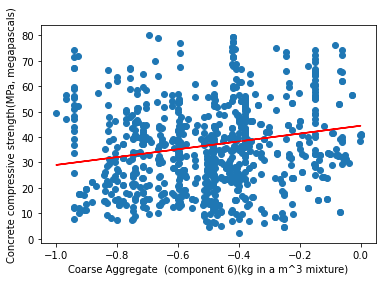

In [202]:
X = normalized_x_train.iloc[:,5]
Y = 44.42483046494536 + X*(15.37889244427782)
plt.scatter(X, normalized_y_train)
plt.xlabel("Coarse Aggregate  (component 6)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

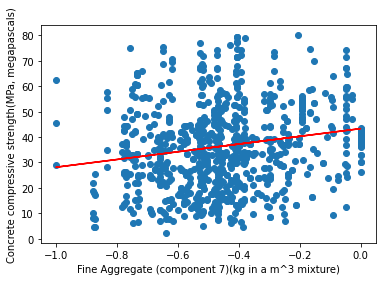

In [203]:
X = normalized_x_train.iloc[:,6]
Y = 43.299035235755866 + X*(15.145794681762572)
plt.scatter(X, normalized_y_train)
plt.xlabel("Fine Aggregate (component 7)(kg in a m^3 mixture)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

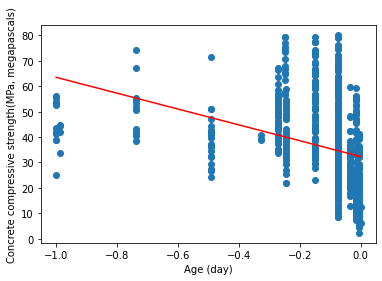

In [204]:
X = normalized_x_train.iloc[:,7]
Y = 32.3392551709954 + X*(-31.112002050171764)
plt.scatter(X, normalized_y_train)
plt.xlabel("Age (day)")
plt.ylabel('Concrete compressive strength(MPa, megapascals)')
plt.plot(X,Y, color='red')
plt.show()

### Histogram of feature values after normalizing

C:\Users\talha\miniconda3\envs\cse217a\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


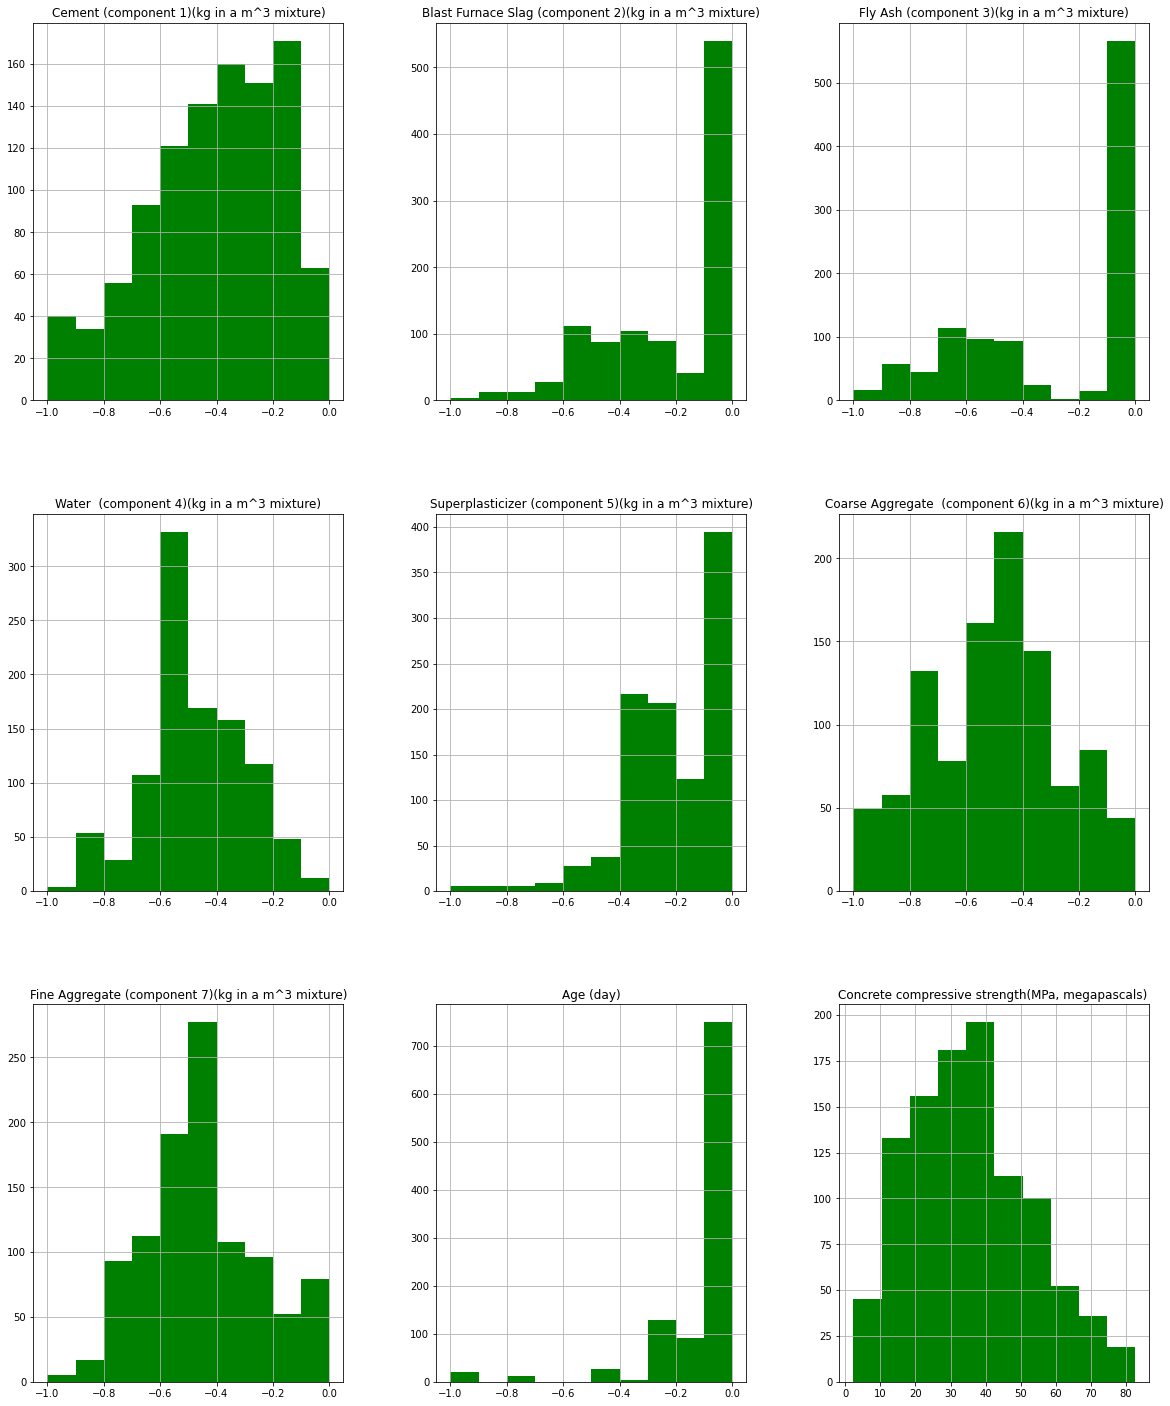

In [205]:
fig = plt.figure(figsize = (20,25))
ax1 = fig.gca()
axes_2 = normalized_data.hist(ax = ax1, color='green')

## Train multivariate model

### Add bias column to data

In [206]:
data2 = data
data2 = pd.concat([pd.Series(1, index =data2.index, name='bias'), data2], axis=1)
data2.head()

,bias,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,1,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [207]:
x_multi = data2.drop(columns='Concrete compressive strength(MPa, megapascals) ')
y_multi = data2['Concrete compressive strength(MPa, megapascals) ']

### Split data into training and testing sets

In [208]:
x_train_multi = x_multi.iloc[0:900, :]
x_test_multi = x_multi.iloc[900:, :]
y_train_multi = y_multi.iloc[0:900]
y_test_multi = y_multi.iloc[900:]

x_train_multi = np.transpose(x_train_multi.values)
x_test_multi = np.transpose(x_test_multi.values)
y_train_multi = y_train_multi.values
y_test_multi = y_test_multi.values

print("Size of the training set: " + str(x_train_multi.shape[1]))
print("Size of the test/evaluation set: " + str(x_test_multi.shape[1]))

Size of the training set: 900
Size of the test/evaluation set: 130


### Regression Model

In [209]:
def meanSquareError(x, y, w):
    n,m = x.shape
    y_predict = np.dot(np.transpose(w), x)
    mse = (1/m) * np.sum(np.square(y_predict - y))
    return mse

In [210]:
def derivative(x, y, w):
    n,m = x.shape
    grad = (2/m)*(np.dot(((np.dot(np.transpose(w), x)) - y), np.transpose(x)))
    return np.reshape(grad,(n,1))

In [211]:
def multiRegression(x,y, maxIterations, alpha):
    rows = x.shape[0]
    curIterations = 0
    w = np.random.uniform(0,1, (rows,1))
    loss = meanSquareError(x, y, w)
    
    while (curIterations < maxIterations):
        grad = derivative(x, y, w)
        w = w - alpha * grad
        updated_MSE = meanSquareError(x, y, w)
        
        if updated_MSE > loss:
            alpha = alpha*0.8
        elif updated_MSE <= loss:
            alpha = alpha*1.15
        
        loss = updated_MSE
        curIterations+=1
        
    predict = np.dot(np.transpose(w), x)
    variance_computed = (np.max(y) - np.min(y))
    required_var = 1 - (loss/variance_computed)
    return w, loss, predict, required_var

### Training and results for multivariate model

In [212]:
multivariateWeight, multivariateLoss, multivariatePrediction, multivariateVariance = multiRegression(x_train_multi, y_train_multi, 15000, 0.0000001)
multivariateTestLoss = meanSquareError(x_test_multi,y_test_multi,multivariateWeight)
print( "Training loss is: " , multivariateLoss, ", Testing Loss is: " , multivariateTestLoss, ",\nFinal Weight values are: \n"
      ,multivariateWeight, "\nRequired Variance is: ", multivariateVariance,
      ", Explained variance for testing set is: ", 1-(multivariateTestLoss)/(np.max(y_test_multi) - np.min(y_test_multi)))
    

Training loss is:  115.84001348127406 , Testing Loss is:  66.5805336702365 ,
Final Weight values are: 
 [[ 0.12607135]
 [ 0.1003903 ]
 [ 0.08299149]
 [ 0.06763303]
 [-0.14254365]
 [ 0.62113099]
 [ 0.01310535]
 [ 0.00247794]
 [ 0.11354997]] 
Required Variance is:  -0.4431760464829171 , Explained variance for testing set is:  -0.16049201909054722


### Normalized Multivariate

In [213]:
normalized_data = normalizing(data)

In [214]:
normalized_data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,-1.000000,-0.000000,-0.000000,-0.321357,-0.077640,-0.694767,-0.205720,-0.074176,79.986111
1,-1.000000,-0.000000,-0.000000,-0.321357,-0.077640,-0.738372,-0.205720,-0.074176,61.887366
2,-0.526256,-0.396494,-0.000000,-0.848303,-0.000000,-0.380814,-0.000000,-0.739011,40.269535
3,-0.526256,-0.396494,-0.000000,-0.848303,-0.000000,-0.380814,-0.000000,-1.000000,41.052780
4,-0.220548,-0.368392,-0.000000,-0.560878,-0.000000,-0.515698,-0.580783,-0.986264,44.296075
...,...,...,...,...,...,...,...,...,...
1025,-0.398174,-0.322760,-0.451274,-0.461876,-0.276398,-0.200872,-0.437280,-0.074176,44.284354
1026,-0.502740,-0.000000,-0.577711,-0.592814,-0.322981,-0.049128,-0.550426,-0.074176,31.178794
1027,-0.106164,-0.387869,-0.542729,-0.566467,-0.189441,-0.265698,-0.466633,-0.074176,23.696601
1028,-0.130365,-0.519477,-0.000000,-0.429940,-0.350932,-0.548256,-0.488961,-0.074176,32.768036


### Adding bias column

In [215]:
data2 = normalized_data
data2 = pd.concat([pd.Series(1, index =data2.index, name='bias'), data2], axis=1)
data2.head()

,bias,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1,-1.000000,-0.000000,-0.0,-0.321357,-0.07764,-0.694767,-0.205720,-0.074176,79.986111
1,1,-1.000000,-0.000000,-0.0,-0.321357,-0.07764,-0.738372,-0.205720,-0.074176,61.887366
2,1,-0.526256,-0.396494,-0.0,-0.848303,-0.00000,-0.380814,-0.000000,-0.739011,40.269535
3,1,-0.526256,-0.396494,-0.0,-0.848303,-0.00000,-0.380814,-0.000000,-1.000000,41.052780
4,1,-0.220548,-0.368392,-0.0,-0.560878,-0.00000,-0.515698,-0.580783,-0.986264,44.296075


In [216]:
normalized_x = data2.drop(columns='Concrete compressive strength(MPa, megapascals) ')
normalized_y = data2['Concrete compressive strength(MPa, megapascals) ']

### Splitting normalized data into training and testing sets for multivariate regression

In [217]:
normalized_x_train = normalized_x.iloc[0:900, :]
normalized_x_test = normalized_x.iloc[900:, :]
normalized_y_train = normalized_y.iloc[0:900]
normalized_y_test = normalized_y.iloc[900:]

normalized_x_train = np.transpose(normalized_x_train.values)
normalized_x_test = np.transpose(normalized_x_test.values)
normalized_y_train = normalized_y_train.values
normalized_y_test = normalized_y_test.values

print("Size of the training set: " + str(normalized_x_train.shape[1]))
print("Size of the test/evaluation set: " + str(normalized_x_test.shape[1]))

Size of the training set: 900
Size of the test/evaluation set: 130


### Training and results for nomralized multivariate model

In [218]:
multivariateWeightNormalized, multivariateLossNormalized, multivariatePredictionNormalized, multivariateVarianceNormalized = multiRegression(normalized_x_train, normalized_y_train, 10000, 0.0000001)
multivariateTestLossNormalized = meanSquareError(normalized_x_test,normalized_y_test,multivariateWeightNormalized)
print( "Training loss is: " , multivariateLossNormalized, ", Testing Loss is: " , multivariateTestLossNormalized, ",\nFinal Weight values are: \n"
      ,multivariateWeightNormalized, "\nRequired Variance is: ", multivariateVarianceNormalized,
      ", Explained variance for testing set is: ", 1-(multivariateTestLossNormalized)/(np.max(y_test_multi) - np.min(y_test_multi)))

Training loss is:  114.58251692220448 , Testing Loss is:  60.51506219708714 ,
Final Weight values are: 
 [[  3.53232315]
 [-48.61124268]
 [-34.08109255]
 [-17.24923012]
 [ 22.00649198]
 [-10.0380925 ]
 [ -4.57236918]
 [ -4.16295458]
 [-41.99221894]] 
Required Variance is:  -0.4275097075552434 , Explained variance for testing set is:  -0.05477146011344436
